#Class 3

Materials and examples are derived from Hadley Wickham's text book
https://r4ds.had.co.nz/introduction.html

## 1. Into the Tidyverse
Bracket subsetting is handy, but it can be cumbersome and difficult to read, especially for complicated operations. The tidyverse package is an “umbrella-package” that installs several packages useful for data analysis which work together well such as `tidyr`, `dplyr`, `ggplot2`, `tibble`, etc. We have used already the ggplot2 package. Now we are going to learn about the two packages useful to work with data:

- `dplyr` is a package for making tabular data manipulation easier.
- `tidyr` enables you to swiftly convert between different data formats.


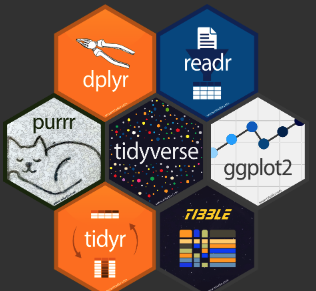

Materials largely derrived from Hadley Wickhams book
https://r4ds.had.co.nz/explore-intro.html

Great supplemental resource: https://www.youtube.com/watch?v=K-ss_ag2k9E

The goal of the first part of this book is to get you up to speed with the basic tools of data exploration as quickly as possible. Data exploration is the art of looking at your data, rapidly generating hypotheses, quickly testing them, then repeating again and again and again. The goal of data exploration is to generate many promising leads that you can later explore in more depth.

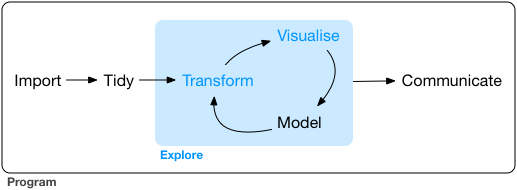

### Data Types in the Tidyverse
- `int` stands for integers.
- `dbl` stands for doubles, or real numbers.
- `chr` stands for character vectors, or strings.
- `dttm` stands for date-times (a date + a time).
- `lgl` stands for logical, vectors that contain only TRUE or FALSE.
- `fctr` stands for factors, which R uses to represent categorical variables with fixed possible values.
- `date` stands for dates.

### Imports and Packages

Import packages necessary for this lesson.

In [ ]:
# load data for data examples
install.packages("gapminder")
install.packages("nycflights13")

In [ ]:
#-- Data Analysis Packages
library("tidyverse")
library("dplyr")

#-- Data
library("nycflights13") #--> may need to install first!
library("gapminder") #--> may need to install first!

## 2. Basic Data Wrangling

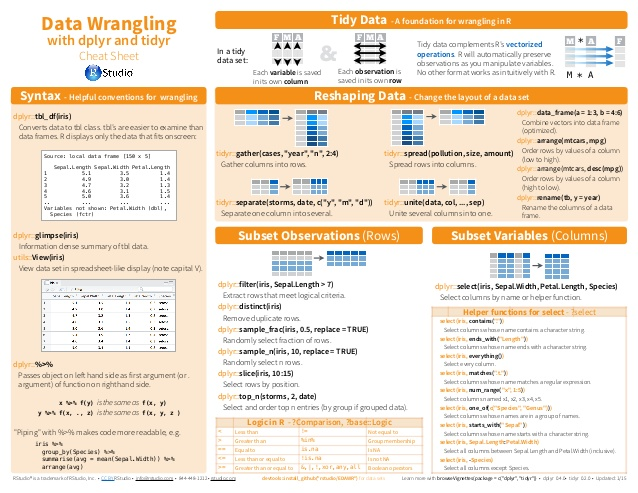

#### Tibbles
For data science in R you will use `tibbles` instead of R’s traditional data.frame. Tibbles are data frames, but they tweak some older behaviours to make life a little easier. R is an old language, and some things that were useful 10 or 20 years ago now get in your way. It’s difficult to change base R without breaking existing code, so most innovation occurs in packages. Here we will describe the tibble package, which provides opinionated data frames that make working in the tidyverse a little easier. In most places, Most people use the term tibble and data frame interchangeably.

We’ll explore the `tibble` package, part of the core `tidyverse`


Column names in Tibbles...
- should not have spaces
- should be unique

To repair column names...
```
colnames(df_all) <- make.names(colnames(df_all_og))
```

##### Looking at Gapminder

This data set has been generated using data from the Gapminder website, which focuses on gathering and sharing statistics and other information about social, economic and environmental development at local, national and global levels.

First let's install the dataset.

##### Getting to know your dataset

In [ ]:
#-- to view the head of the DataFrame
head(gapminder, 5)

In [ ]:
#-- To view the tail of the DataFrame
tail(gapminder, 3)

In [ ]:
#-- Get number of columns
ncol(gapminder)

In [ ]:
#-- Get number of rows
nrow(gapminder)

In [ ]:
#-- to access single column
head(gapminder["country"])

In [ ]:
head(gapminder$country)

#### Filtering

`filter()` allows you to subset observations based on their values. The first argument is the name of the data frame. The second and subsequent arguments are the expressions that filter the data frame. For example, we can select all flights on January 1st with:

In [ ]:
#-- Filter gapminder for only the year 2002
year_2002 <- dplyr::filter(gapminder, year == 2002)
head(year_2002, 3)

What is the `::`? This is a way to specify where the function comes from. This is similar to Python with import pandas as pd then calling pd.DataFrame(). In this example, the `.` in Python is akin to `::` in R

In [ ]:
#-- Filter with multiple arguments evaluates to `AND` logic
year_2000 <- dplyr::filter(gapminder, year == 2002, continent == 'Asia', pop >= 100000000)
head(year_2000, 10)

To use filtering effectively, you have to know how to select the observations that you want using the comparison operators. R provides the standard suite: `>`, `>=`, `<`, `<=`, `!=` (not equal), and `==` (equal).


In [ ]:
#-- Filter gapminder for only the US and Canada using the or operator
filtered_df <- dplyr::filter(gapminder, country=='United States' | country=='Canada', year==2002)
head(filtered_df, 3)

A useful short-hand for this problem is x `%in%` y. This will select every row where x is one of the values in y. We could use it to rewrite the code above:

In [ ]:
#-- Filter gapminder for only the US and Canada using the %in% operator
keep_countries <- c('United States', 'Canada')
filtered_df <- dplyr::filter(gapminder, country %in% keep_countries, year==2002)
head(filtered_df, 3)

It’s not uncommon to get datasets with hundreds or even thousands of variables. In this case, the first challenge is often narrowing in on the variables you’re actually interested in. `select()` allows you to rapidly zoom in on a useful subset using operations based on the names of the variables.

`select()` is not terribly useful with the flights data because we only have 19 variables, but you can still get the general idea:

In [ ]:
head(dplyr::select(gapminder, country, continent, pop),5)


#### Creating New Variables

Besides selecting sets of existing columns, it’s often useful to add new columns that are functions of existing columns. That’s the job of `mutate()`.

`mutate()` always adds new columns at the end of your dataset so we’ll start by creating a narrower dataset so we can see the new variables. Remember that when you’re in RStudio, the easiest way to see all the columns is `View()`.

In [ ]:
head(gapminder)

In [ ]:
#-- Notice we have population and GDP per Capita, but not GDP, Let's back out GDP
gapminder <- dplyr::mutate(gapminder,
  GDP = pop * gdpPercap
)
head(gapminder,4)

#### Groupby

`summarise()` is not terribly useful unless we pair it with `group_by()`. This changes the unit of analysis from the complete dataset to individual groups. Then, when you use the dplyr verbs on a grouped data frame they’ll be automatically applied “by group”. For example, if we applied exactly the same code to a data frame grouped by date, we get the average delay per date:

In [ ]:
by_continent <- group_by(gapminder, continent)
# na.rm = TRUE means to ignore missing values in the calculation
summarise(by_continent, avg_gdp = mean(GDP, na.rm = TRUE))

In [ ]:
by_continent <- group_by(gapminder, continent)
summarise(by_continent, avg_gdp = mean(GDP, na.rm = TRUE))

In [ ]:
# or in one line
summarise(group_by(gapminder, continent), avg_gdp = mean(GDP, na.rm = TRUE))

In [ ]:
by_year <- group_by(gapminder, year)
summarise(by_year, avg_gdp = mean(GDP, na.rm = TRUE))

#### The `Pipe` Operator
This focuses on the transformations, not what’s being transformed, which makes the code easier to read. You can read it as a series of imperative statements: group, then summarise, then filter. As suggested by this reading, a good way to pronounce %>% when reading code is “then”.

Behind the scenes, x `%>%` f(y) turns into f(x, y), and x %>% f(y) %>% g(z) turns into g(f(x, y), z) and so on. You can use the pipe to rewrite multiple operations in a way that you can read left-to-right, top-to-bottom. We’ll use piping frequently from now on because it considerably improves the readability of code, and we’ll come back to it in more detail in pipes.

Working with the pipe is one of the key criteria for belonging to the tidyverse. The only exception is ggplot2: it was written before the pipe was discovered. Unfortunately, the next iteration of ggplot2, ggvis, which does use the pipe, isn’t quite ready for prime time yet.

(Note: `%>%` is implemented by a tidyverse package, but recent versions of R have now natively implemented piping by using `|>`. Neverthless, we will use `%>%` below to honor tradition, but feel free to use `|>` in your code.)

In [ ]:
by_continent <- gapminder %>%
                  group_by(continent) %>%
                    summarise(
                      mean_of_gdp = mean(GDP, na.rm = TRUE)
                    )
head(by_continent, 3)

In [ ]:
#-- And you can keep piping different functions
by_year <- gapminder %>%
            group_by(year) %>%
            summarise(
              mean_of_gdp = mean(GDP, na.rm = TRUE)
            ) %>%
            filter(year > 1990)
head(by_year, 3)

##3. Reading in Data

### Google Colab

To `import` data, in Google Colab, you must add the data into their specific environment.

#### Step 1: Select the folder button

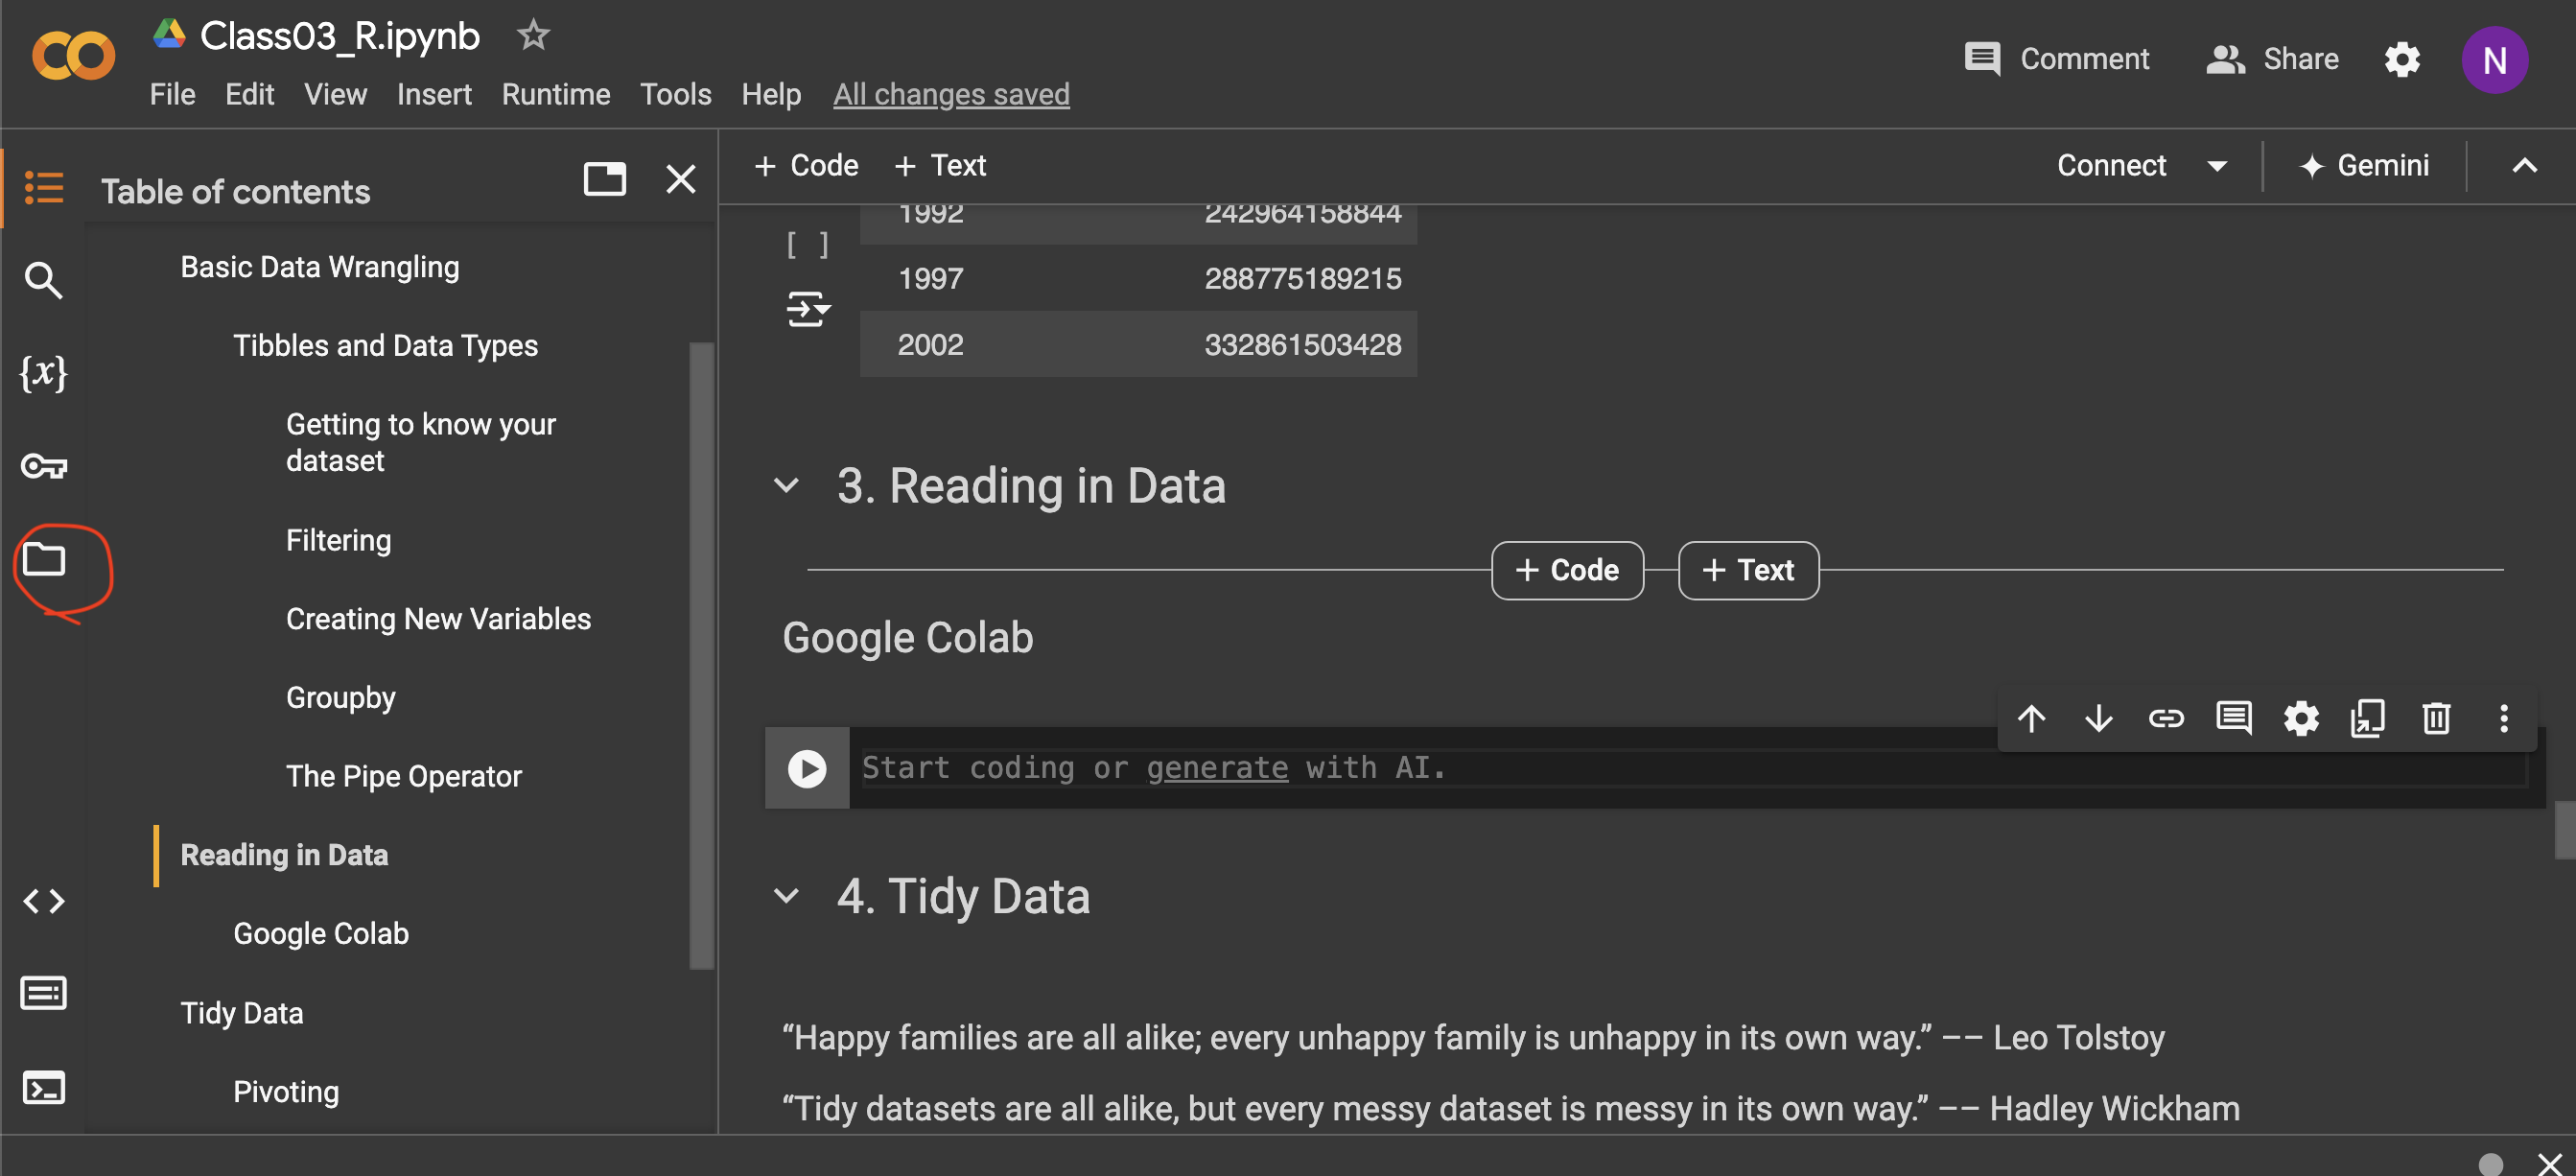

#### Step 2: Use the upload button, or drag and drop your file

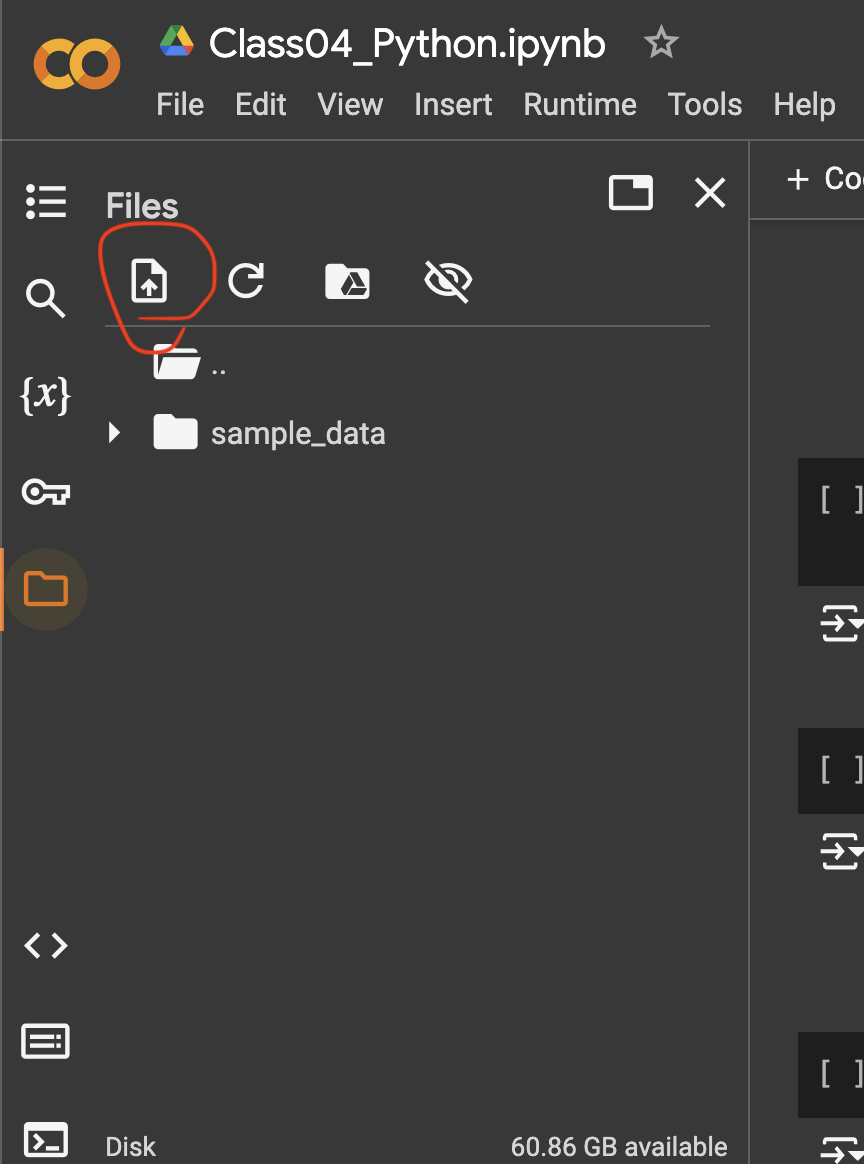

### R Studio

#### Step 1: Set your working directory
```
setwd('/Users/edwardhulseman/Desktop')
```

#### `Step 2`: Use the appropriate readr function
e.g. for a csv
```
install.packages("tidyverse")

library("tidyverse")
library(dplyr)
path <- "day (1).csv"

df <- readr::read_csv(path)
```

## 4. Tidy Data

“Happy families are all alike; every unhappy family is unhappy in its own way.” –– Leo Tolstoy

“Tidy datasets are all alike, but every messy dataset is messy in its own way.” –– Hadley Wickham

In this chapter, you will learn a consistent way to organise your data in R, an organisation called tidy data. Getting your data into this format requires some upfront work, but that work pays off in the long term. Once you have tidy data and the tidy tools provided by packages in the tidyverse, you will spend much less time munging data from one representation to another, allowing you to spend more time on the analytic questions at hand.

#### Pivoting

This means for most real analyses, you’ll need to do some tidying. The first step is always to figure out what the variables and observations are. Sometimes this is easy; other times you’ll need to consult with the people who originally generated the data. The second step is to resolve one of two common problems:

- One variable might be spread across multiple columns.

- One observation might be scattered across multiple rows.

Typically a dataset will only suffer from one of these problems; it’ll only suffer from both if you’re really unlucky! To fix these problems, you’ll need the two most important functions in tidyr: `pivot_longer()` and `pivot_wider()`.

In [ ]:
head(gapminder)

In [ ]:
gapminder_long <- gapminder %>%
  pivot_longer(
    lifeExp:GDP,
    names_to = "measure",
    values_to = "value"
  )
  head(gapminder_long, 10)


In [ ]:
gapminder_wide <- gapminder %>%
  pivot_wider(
    names_from = year,
    values_from = c(lifeExp, pop, gdpPercap, GDP)
  )
  head(gapminder_wide, 10)


## 4. Joins

`Outer Join`
Let’s say you want to have a table that contains all your user and event table data together.

You would use an Outer Join to join the tables together. An outer join combines the columns from all tables on one or more common dimension when possible, and includes all data from all tables.

`Inner Join`
What if you want to have a table that contains only users that have done an action?

You would use an Inner Join to join the tables together. An inner join combines the columns on a common dimension (the first N columns) when possible, and only includes data for the columns that share the same values in the common N column(s). In the example, the User ID would be the common dimension used for the inner join.

`Left Join`
Now, what if you want to have a table that contains all the users’ data and only actions that those users have done? Actions performed by other users not in the users table should not be included?

You would use a Left Join to join the tables together. A left join combines the columns on a common dimension (the first N columns) when possible, returning all rows from the first table with the matching rows in the consecutive tables. The result is NULL in the consecutive tables when there is no match. In this case, we would make the User Table the first (left table) to use for the left join.

In [ ]:
head(airlines,10)

In [ ]:
head(flights,10)

Left Join

In [ ]:
left_merge_example <- flights %>%
          left_join(airlines, by = "carrier")
head(left_merge_example,3)